# 鶴の翼の面積を求めよ

In [1]:
%matplotlib inline

from sympy import *
from sympy.geometry import *
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
from matplotlib.path import Path
import matplotlib.patches as patches

init_printing()

import math
import numpy

xlim = (-0.25,1.25)
ylim = (-0.25,1.25)

def slope_from_points(point1, point2):
    return (point2.y - point1.y)/(point2.x - point1.x)

def get_xlim_value(point1, point2):
    # plot the secant
    slope = slope_from_points(point1, point2)
    intercept = point1.y - slope*point1.x
    # update the points to be on the axes limits
    if point1.x == point2.x:
        data_x = (point1.x, point1.x)
        data_y = ylim
    else:
        data_x = xlim
        data_y = (xlim[0]*slope+intercept, ylim[1]*slope+intercept)
    return data_x, data_y

try:
    currentobjs = currentobjs
except NameError:
    currentobjs = []

def plot(obj, selected):
    if type(obj) == Point2D:
        if selected == False:
            plt.plot(obj.x, obj.y, 'ro')
        else:
            plt.plot(obj.x, obj.y, 'o', color="orange")
    if type(obj) == Segment:
        # plt.axes().add_line(mpl_lines.Line2D((obj.p1.x, obj.p2.x), (obj.p1.y, obj.p2.y)))
        if selected == False:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], 'b-')
        else:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], '-', color="orange", linewidth=2)
    if type(obj) == Line:
        coor = get_xlim_value(obj.p1,obj.p2)
        if selected == False:
            plt.plot(coor[0], coor[1], 'b-')
        else:
            plt.plot(coor[0], coor[1], '-', color="orange", linewidth=2)
    if type(obj) == Polygon or type(obj) == Triangle:
        verts = []
        codes = []
        
        for k,v in enumerate(obj.vertices):
            verts.append((v.x, v.y))
            if k == 0:
                codes.append(Path.MOVETO)
            else:
                codes.append(Path.LINETO)
        verts.append((obj.vertices[0].x, obj.vertices[0].y))
        codes.append(Path.CLOSEPOLY)
        
        path = Path(verts, codes)
        if selected == False:
            patch = patches.PathPatch(path, facecolor=(0,1,0.5,0.5), edgecolor="none", lw=1)
        else:
            patch = patches.PathPatch(path, facecolor=(1,0.5,0,0.5), edgecolor="none", lw=2)
        plt.gca().add_patch(patch)

def draw(*objs, add_currentobjs=True, sizex=16, sizey=8):
    rowcount = 2
    colcount = math.ceil(len(objs) / rowcount)
    plt.figure(figsize=(sizex,sizey))
    for index, obj in enumerate(objs):
        plt.subplot(rowcount, colcount, index+1)
        
        plt.gca().set_xlim(xlim)
        plt.gca().set_ylim(ylim)
        plt.gca().set_aspect('equal')
        
        for currentobj in currentobjs:
            plot(currentobj, False)
        plot(obj, True)
        
        if add_currentobjs:
            currentobjs.append(obj)
            plt.title(str(len(currentobjs)))
    
    plt.show()

## 作図手順
1 - A(0,0)をとる

2 - B(1,0)をとる

3 - C(0,1)をとる

4 - D(0,1)をとる

5 - CからDへ線分fを引く

6 - DからBへ線分gを引く

7 - BからAへ線分hを引く

8 - AからCへ線分iを引く

9 - AからDへ線分pを引く

10 - CからBへ線分lを引く

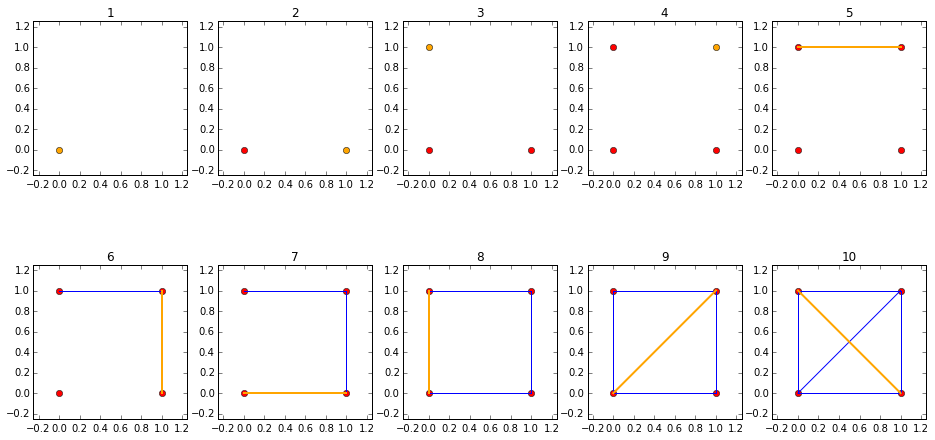

In [2]:
A = Point(0, 0) # 1
B = Point(1, 0) # 2
C = Point(0, 1) # 3
D = Point(1, 1) # 4

f = Segment(C, D) # 5
g = Segment(D, B) # 6
h = Segment(B, A) # 7
i = Segment(A, C) # 8
p = Segment(A, D) # 9
l = Segment(C, B) # 10

draw(A,B,C,D,f,g,h,i,p,l)

11 - CAを垂直に二等分する直線jを引く

12 - CDを垂直に二等分する直線kを引く

13 - kとfの交点Eをとる

14 - jとkの交点Fをとる

15 - jとiの交点Gをとる

16 - kとhの交点Hをとる

17 - jとgの交点Iをとる

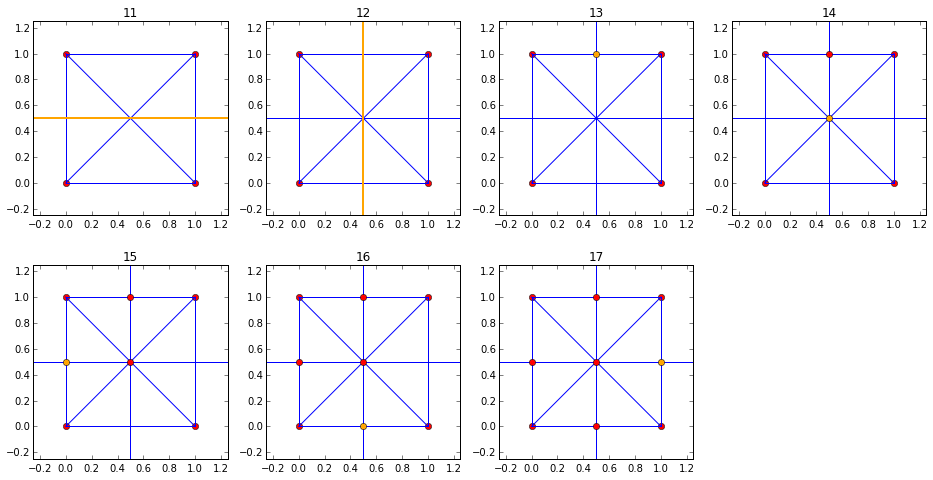

In [3]:
j = Segment(C, A).perpendicular_bisector() # 11
k = Segment(C, D).perpendicular_bisector() # 12

E = intersection(k,f)[0] # 13
F = intersection(j,k)[0] # 14
G = intersection(j,i)[0] # 15
H = intersection(k,h)[0] # 16
I = intersection(j,g)[0] # 17

draw(j,k,E,F,G,H,I)

18 - ∠ECFを2等分する直線mを引く

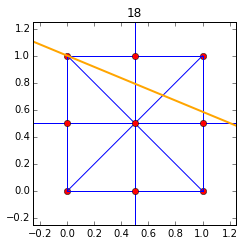

In [4]:
m = Line(Triangle(E, C, F).bisectors()[C]) # 18
draw(m)

19 - mとkの交点Jをとる

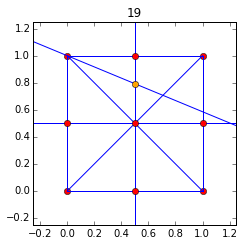

In [5]:
J = intersection(m,k)[0] # 19
draw(J)

20 - ∠ECJを2等分する直線nを引く

21 - pと平行でJを通る直線qを引く

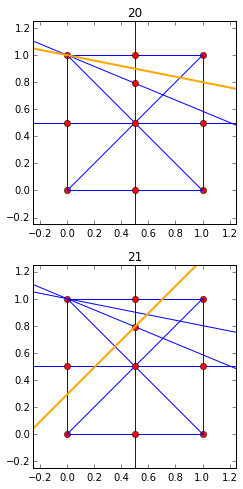

In [6]:
n = Line(Triangle(E, C, J).bisectors()[C]) # 20
q = p.parallel_line(J) # 21
draw(n,q)

22 - nとqの交点Kをとる

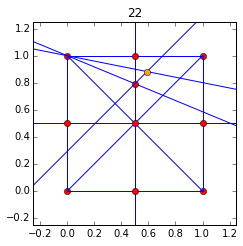

In [7]:
K = intersection(n, q)[0] # 22
draw(K)

23 - kと平行でKを通る直線rを引く

24 - ∠EDFを2等分する直線sを引く

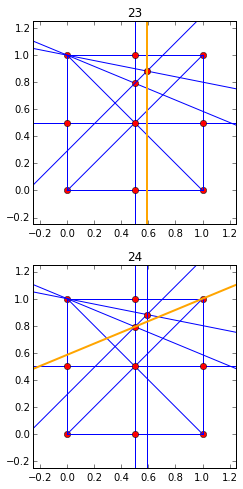

In [8]:
r = k.parallel_line(K) # 23
s = Line(Triangle(E, D, F).bisectors()[D]) # 24
draw(r,s)

25 - fに関してKと対象な点K'をとる

26 - nとsの交点Lをとる

27 - fに関してLと対象な点L'をとる

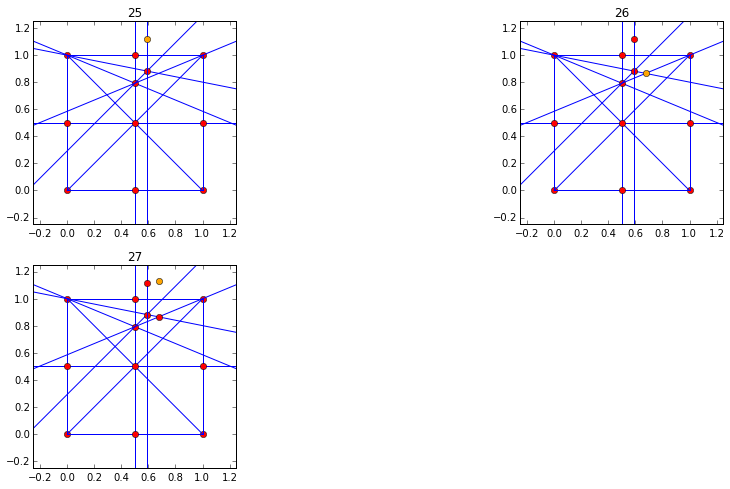

In [9]:
K_ = K.reflect(f) # 25
L = intersection(n,s)[0] # 26
L_ = L.reflect(f) # 27
draw(K_,L,L_)

28 - K', K, L, D, L'を結んだ5角形が鶴の翼の片側の部分である。

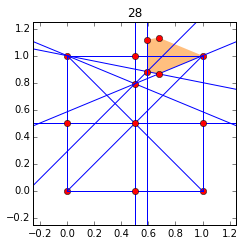

In [10]:
tsubasa = Polygon(K_, K, L, D, L_)
draw(tsubasa)

## 求積

では、次に、この部分の面積を求めてみよう。上記の手順で作図すると、色のついた部分の面積は、

In [11]:
summation = tsubasa.area

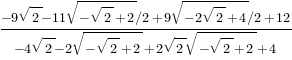

In [12]:
summation

と表せる。

2倍して、

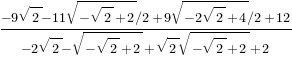

In [13]:
2*(summation)

因数分解して、

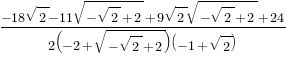

In [14]:
factor(2*(summation))

有理化して、

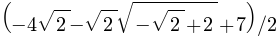

In [15]:
radsimp(factor(2*(summation)))

展開して、

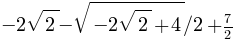

In [16]:
simplify(radsimp(factor(2*(summation))))

これが鶴の翼の面積となる。

## おまけ(THE・蛇足)

### Jの座標

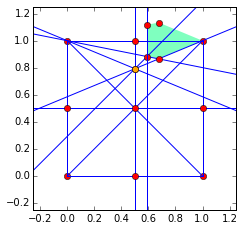

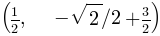

In [17]:
draw(J, add_currentobjs=False)
(J.x, J.y)

### Kの座標

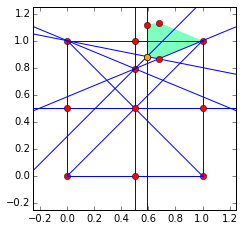

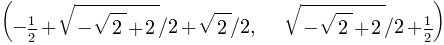

In [18]:
draw(K, add_currentobjs=False)
(K.x, K.y)

### K'の座標

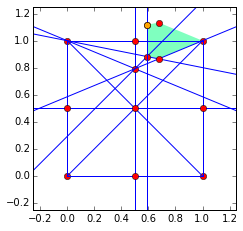

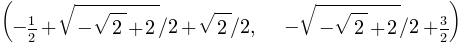

In [19]:
draw(K_, add_currentobjs=False)
(K_.x, K_.y)

### Lの座標

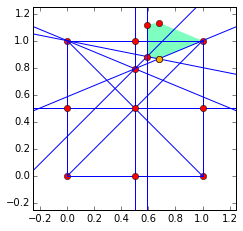

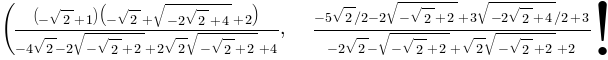

In [20]:
draw(L, add_currentobjs=False)
(L.x, L.y)

↓

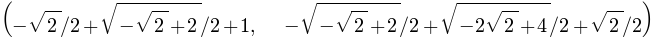

In [21]:
(simplify(radsimp(factor(L.x))), simplify(radsimp(factor(L.y))))

### L'の座標

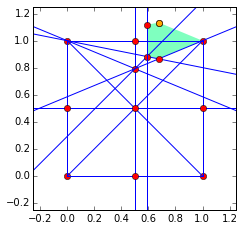

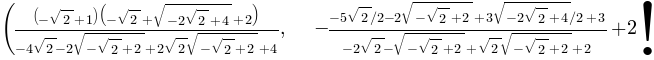

In [22]:
draw(L_, add_currentobjs=False)
(L_.x, L_.y)

↓

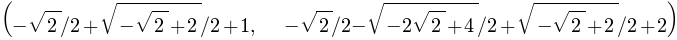

In [23]:
(simplify(radsimp(factor(L_.x))), simplify(radsimp(factor(L_.y))))

### mの式

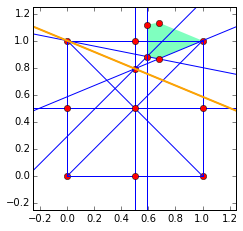

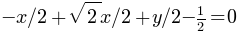

In [24]:
draw(m, add_currentobjs=False)
expand(Eq(m.equation()))

### nの式

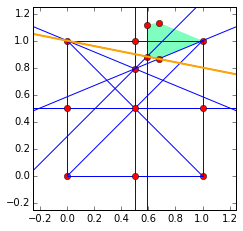

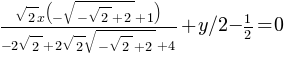

In [25]:
draw(n, add_currentobjs=False)
Eq(n.equation())

### qの式

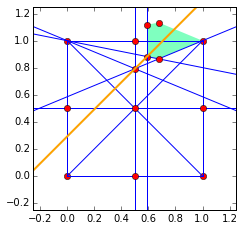

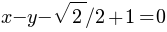

In [26]:
draw(q, add_currentobjs=False)
Eq(q.equation())

### rの式

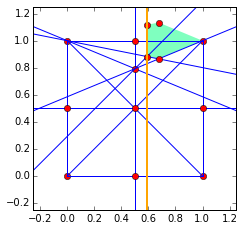

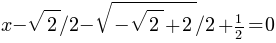

In [27]:
draw(r, add_currentobjs=False)
Eq(r.equation())

### sの式

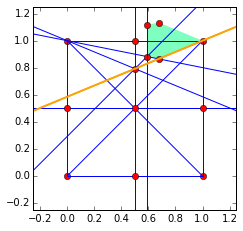

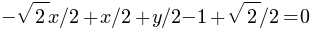

In [28]:
draw(s, add_currentobjs=False)
expand(Eq(s.equation()))

### KLの長さ

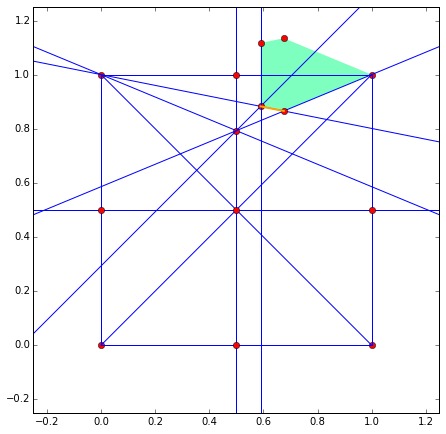

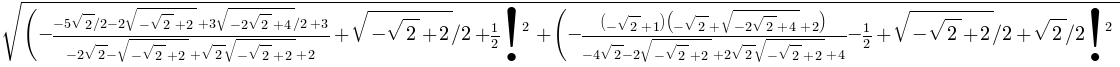

In [29]:
draw(Segment(K, L), add_currentobjs=False, sizex=16, sizey=16)
Segment(K, L).length

↓

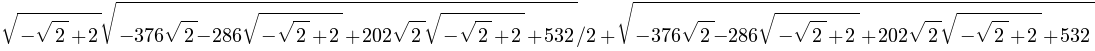

In [30]:
expand(sqrtdenest(simplify(radsimp(factor(Segment(K, L).length)))))

### LDの長さ

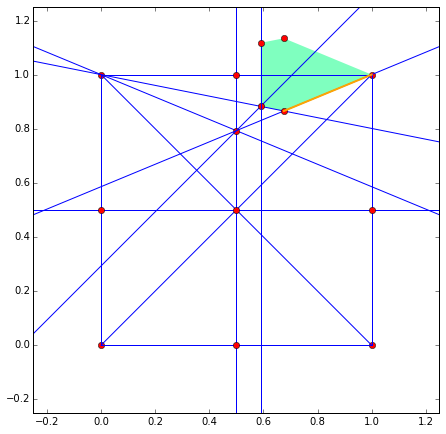

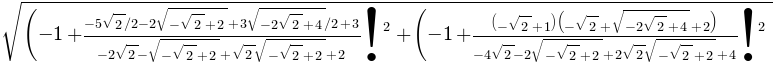

In [31]:
draw(Segment(L, D), add_currentobjs=False, sizex=16, sizey=16)
Segment(L, D).length

↓

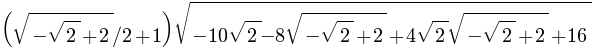

In [32]:
simplify(radsimp(factor(Segment(L, D).length)))

↓

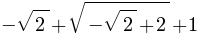

In [33]:
expand(sqrtdenest(simplify(radsimp(factor(Segment(L, D).length)))))

### rとsの交点の座標

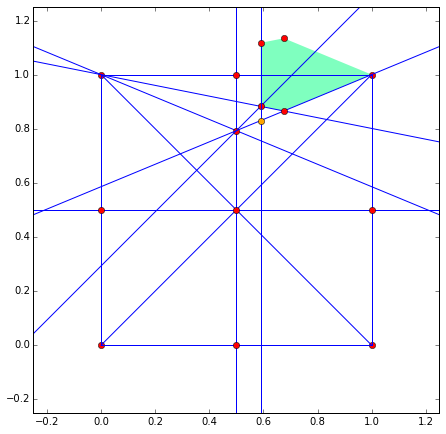

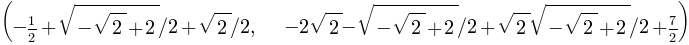

In [34]:
draw(intersection(r,s)[0], add_currentobjs=False, sizex=16, sizey=16)
(intersection(r,s)[0].x, expand(intersection(r,s)[0].y))

### (rとsの交点)とLを結んだ線分の長さ

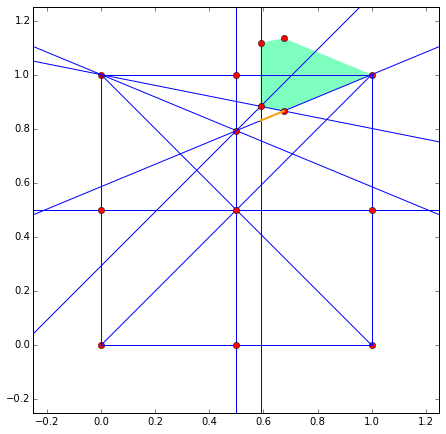

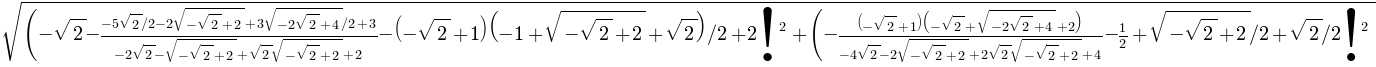

In [35]:
draw(Segment(intersection(r,s)[0], L), add_currentobjs=False, sizex=16, sizey=16)
Segment(intersection(r,s)[0], L).length

↓

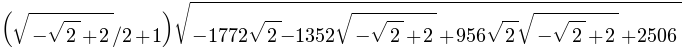

In [36]:
simplify(radsimp(factor(Segment(intersection(r,s)[0], L).length)))

↓

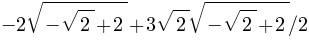

In [37]:
expand(sqrtdenest(simplify(radsimp(factor(Segment(intersection(r,s)[0], L).length)))))

### (rとsの交点)とKを結んだ線分の長さ

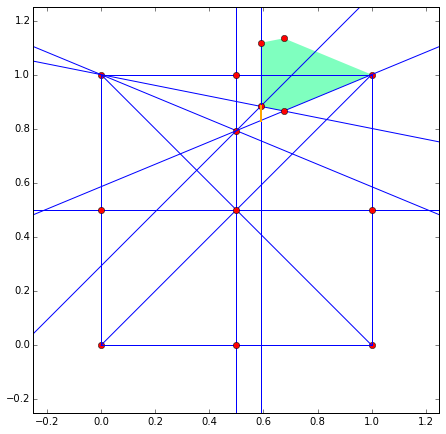

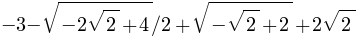

In [38]:
draw(Segment(intersection(r,s)[0], K), add_currentobjs=False, sizex=16, sizey=16)
simplify(Segment(intersection(r,s)[0], K).length)

### (rとsの交点)とKとLを結んでできる三角形の面積

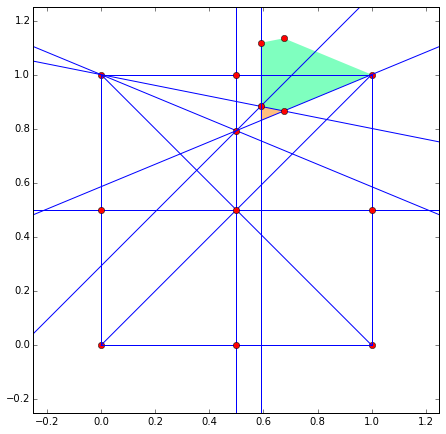

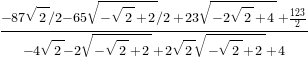

In [39]:
draw(Polygon(intersection(r,s)[0], K, L), add_currentobjs=False, sizex=16, sizey=16)
Polygon(intersection(r,s)[0], K, L).area

↓

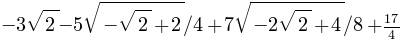

In [40]:
simplify(radsimp(factor(Polygon(intersection(r,s)[0], K, L).area)))

### (DL'の延長とrの交点)と(rとsの交点)とDを結んでできる三角形の面積

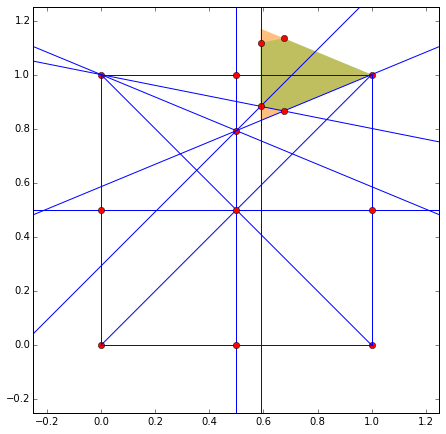

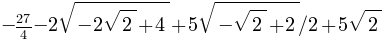

In [41]:
draw(Polygon(intersection(Line(D, L_), r)[0], intersection(r,s)[0], D), add_currentobjs=False, sizex=16, sizey=16)
Polygon(intersection(Line(D, L_), r)[0], intersection(r,s)[0], D).area

### (DL'の延長とrの交点)と(rとsの交点)を結んでできる線分の長さ

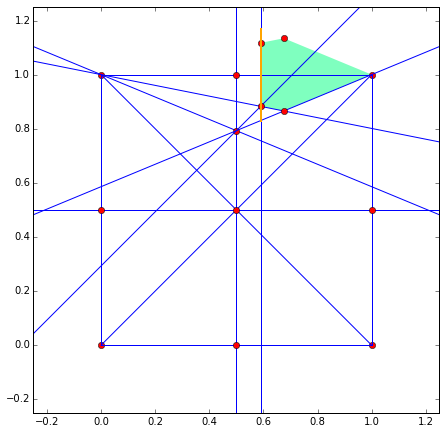

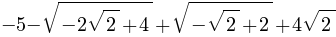

In [42]:
draw(Segment(intersection(Line(D, L_), r)[0], intersection(r,s)[0]), add_currentobjs=False, sizex=16, sizey=16)
simplify(Segment(intersection(Line(D, L_), r)[0], intersection(r,s)[0]).length)